<a href="https://colab.research.google.com/github/RaniaBZ/Innomatics_Research_Labs_Hackathon_Project/blob/main/Innomatics_Research_Lab_Hackathon_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1. Links dataset


In [49]:
df_links = pd.read_csv('/content/links.csv')

In [50]:
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [51]:
df_links.shape

(9742, 3)

2. Movies dataset

In [52]:
df_movies = pd.read_csv('/content/movies.csv')

In [53]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#The shape of movies data set:

In [54]:
df_movies.shape

(9742, 3)

Observation: The shape of the movies data set is : (9742,3)

3. Ratings dataset

In [55]:
df_ratings = pd.read_csv('/content/ratings.csv')

In [56]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


#The shape of ratings data set :

In [57]:
df_ratings.shape

(100836, 4)

Observation: The shape of ratings data set is (100836)

4. Tags dataset


In [58]:
df_tags = pd.read_csv('/content/tags.csv')

In [59]:
df_tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [60]:
df_tags.shape

(3683, 4)

#Total number of CSV files

In [61]:
import os
directory = '/content/'
files = os.listdir(directory)
csv_files = [file for file in files if file.endswith('.csv')]
csv_count = len(csv_files)

print(f"Number of CSV files: {csv_count}")

Number of CSV files: 4


Observation: The total number of csv files are 4

#Unique "userId" available in "ratings.csv":

In [62]:
df_ratings['userId'].nunique()

610

Observation: There are 610 unique values in ratings.csv file

#Movies with the maximum number of ratings

In [63]:
movie_ratings_count = df_ratings.groupby('movieId')['rating'].count()
most_rated_movie_id = movie_ratings_count.idxmax()
most_rated_movie_name = df_movies[df_movies['movieId'] == most_rated_movie_id]['title'].values[0]
print(f"Movie with the most ratings: {most_rated_movie_name}")

Movie with the most ratings: Forrest Gump (1994)


Observation : Forrest Gump (1994) has recieved maximum number of user ratings


#Unique tags submitted by users for 'Matrix, The (1999)'

In [64]:
matrix_movie_id = df_movies[df_movies['title'] == 'Matrix, The (1999)']['movieId'].values[0]
matrix_tags = df_tags[df_tags['movieId'] == matrix_movie_id]['tag']
unique_matrix_tags = matrix_tags.unique()
print(f"Unique tags submitted by users for 'Matrix, The (1999)': {list(unique_matrix_tags)}")

Unique tags submitted by users for 'Matrix, The (1999)': ['martial arts', 'sci-fi', 'alternate universe', 'philosophy', 'post apocalyptic']


Observation : The correct tags submitted by users to "Matrix, The (1999)" movie are:  ['martial arts', 'sci-fi', 'alternate universe', 'philosophy', 'post apocalyptic']

#Average user rating for 'Terminator 2: Judgment Day (1991)'

In [65]:
movie_id = df_movies[df_movies['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].values[0]
terminator_ratings = df_ratings[df_ratings['movieId'] == movie_id]['rating']
average_rating = terminator_ratings.mean()
print(f"Average user rating for 'Terminator 2: Judgment Day (1991)': {average_rating}")

Average user rating for 'Terminator 2: Judgment Day (1991)': 3.970982142857143


Observation : The average user rating for movie named "Terminator 2: Judgment Day (1991)" is 3.970982142857143

#The data distribution of user ratings for 'Fight Club (1999)'

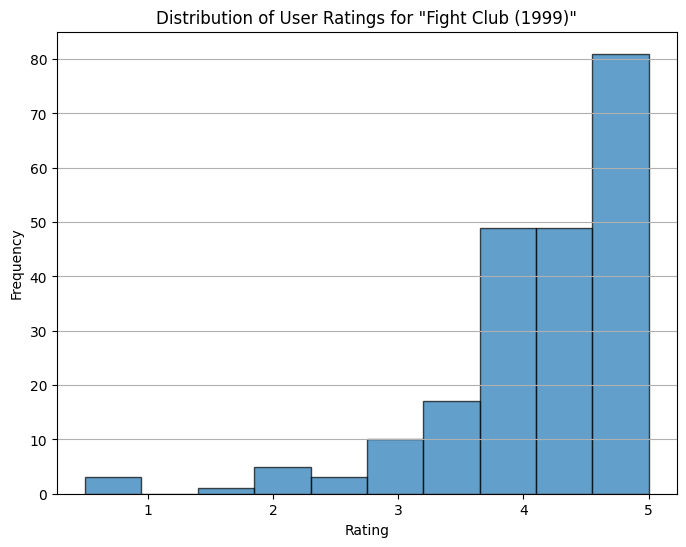

In [66]:
fight_club_movie_id = df_movies[df_movies['title'] == 'Fight Club (1999)']['movieId'].values[0]
fight_club_ratings = df_ratings[df_ratings['movieId'] == fight_club_movie_id]['rating']
plt.figure(figsize=(8, 6))
plt.hist(fight_club_ratings, bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

Observation: The data distribution of user ratings for "Fight Club (1999)" movie look likes left skewed distribution


#Mandatory Operations:
1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings.
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50).


In [67]:
#1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings.
aggregated_ratings = df_ratings.groupby('movieId')['rating'].agg(['count', 'mean'])
print(aggregated_ratings.head())

         count      mean
movieId                 
1          215  3.920930
2          110  3.431818
3           52  3.259615
4            7  2.357143
5           49  3.071429


In [68]:
#2.Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
aggregated_ratings = df_ratings.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()
merged_df = pd.merge(df_movies, aggregated_ratings, on='movieId', how='inner')
print(merged_df.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  count      mean  
0  Adventure|Animation|Children|Comedy|Fantasy    215  3.920930  
1                   Adventure|Children|Fantasy    110  3.431818  
2                               Comedy|Romance     52  3.259615  
3                         Comedy|Drama|Romance      7  2.357143  
4                                       Comedy     49  3.071429  


In [69]:
#3. Filter only those movies which have more than 50 user ratings (i.e. > 50).
aggregated_ratings = df_ratings.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()
merged_df = pd.merge(df_movies, aggregated_ratings, on='movieId', how='inner')
filtered_movies = merged_df[merged_df['count'] > 50]
print(filtered_movies.head())

   movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   
5        6              Heat (1995)   
6        7           Sabrina (1995)   

                                        genres  count      mean  
0  Adventure|Animation|Children|Comedy|Fantasy    215  3.920930  
1                   Adventure|Children|Fantasy    110  3.431818  
2                               Comedy|Romance     52  3.259615  
5                        Action|Crime|Thriller    102  3.946078  
6                               Comedy|Romance     54  3.185185  


#Filter only those movies which have more than 50 user ratings (i.e. > 50).

In [70]:
aggregated_ratings = df_ratings.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()
merged_df = pd.merge(df_movies, aggregated_ratings, on='movieId', how='inner')
filtered_movies = merged_df[merged_df['count'] > 50]
most_popular_movie = filtered_movies.loc[filtered_movies['mean'].idxmax()]
print(f"The most popular movie based on average user ratings is '{most_popular_movie['title']}' with an average rating of {most_popular_movie['mean']:.2f}.")

The most popular movie based on average user ratings is 'Shawshank Redemption, The (1994)' with an average rating of 4.43.


 Observation : Movies which have more than 50 user ratings (i.e. > 50) is: 'Shawshank Redemption, The (1994)' with an average rating of 4.43.

#Top 5 popular movies based on number of user ratings

In [71]:
aggregated_ratings = df_ratings.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()
merged_df = pd.merge(df_movies, aggregated_ratings, on='movieId', how='inner')
filtered_movies = merged_df[merged_df['count'] > 50]
top_5_movies = filtered_movies.nlargest(5, 'count')
top_5_titles = top_5_movies['title'].tolist()
given_movies = [
    'Pulp Fiction (1994)',
    'Bad Boys (1995)',
    'Silence of the Lambs, The (1991)',
    'Matrix, The (1999)'
]
result_movies = [movie for movie in given_movies if movie in top_5_titles]
print("Top 5 popular movies based on number of user ratings include:")
print(result_movies)

Top 5 popular movies based on number of user ratings include:
['Pulp Fiction (1994)', 'Silence of the Lambs, The (1991)', 'Matrix, The (1999)']


Observation :Top 5 popular movies based on number of user ratings are: ['Pulp Fiction (1994)', 'Silence of the Lambs, The (1991)', 'Matrix, The (1999)']

#The "third most popular" sci-fi movies based on the number of user ratings?

In [72]:
aggregated_ratings = df_ratings.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()
merged_df = pd.merge(df_movies, aggregated_ratings, on='movieId', how='inner')
filtered_movies = merged_df[merged_df['count'] > 50]
sci_fi_movies = filtered_movies[filtered_movies['genres'].str.contains('Sci-Fi')]
sorted_sci_fi_movies = sci_fi_movies.sort_values(by='count', ascending=False)
third_most_popular_sci_fi = sorted_sci_fi_movies.iloc[2]
print(f"The third most popular Sci-Fi movie based on the number of user ratings is '{third_most_popular_sci_fi['title']}'.")

The third most popular Sci-Fi movie based on the number of user ratings is 'Jurassic Park (1993)'.


Observation : The third most popular Sci-Fi movie based on the number of user ratings is 'Jurassic Park (1993)'

#The Webscraping

In [73]:
import pandas as pd
import time
import requests
from bs4 import BeautifulSoup
import numpy as np


links_df = pd.read_csv('/content/links.csv')
filtered= filtered_movies[filtered_movies ['count'] > 50]
filtered= pd.merge(filtered, links_df[['movieId', 'imdbId']], on='movieId')
filtered['imdb_rating'] = filtered['imdbId'].apply(lambda x: scrapper(x))

time.sleep(2)

print(filtered[['title', 'imdb_rating']].head())

Scraping URL: https://www.imdb.com/title/tt0114709/
Scraping URL: https://www.imdb.com/title/tt0113497/
Scraping URL: https://www.imdb.com/title/tt0113228/
Scraping URL: https://www.imdb.com/title/tt0113277/
Scraping URL: https://www.imdb.com/title/tt0114319/
Scraping URL: https://www.imdb.com/title/tt0113189/
Scraping URL: https://www.imdb.com/title/tt0112346/
Scraping URL: https://www.imdb.com/title/tt0112641/
Scraping URL: https://www.imdb.com/title/tt0114388/
Scraping URL: https://www.imdb.com/title/tt0112281/
Scraping URL: https://www.imdb.com/title/tt0113161/
Scraping URL: https://www.imdb.com/title/tt0113627/
Scraping URL: https://www.imdb.com/title/tt0114746/
Scraping URL: https://www.imdb.com/title/tt0112431/
Scraping URL: https://www.imdb.com/title/tt0112818/
Scraping URL: https://www.imdb.com/title/tt0112697/
Scraping URL: https://www.imdb.com/title/tt0114369/
Scraping URL: https://www.imdb.com/title/tt0114148/
Scraping URL: https://www.imdb.com/title/tt0114814/
Scraping URL

In [74]:
def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"

    print(f"Scraping URL: {URL}")  # Debugging output

    request_header = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'
    }

    response = requests.get(URL, headers=request_header)

    if response.status_code != 200:
        print(f"Failed to retrieve {URL}, status code: {response.status_code}")
        return np.nan

    soup = BeautifulSoup(response.text, 'html.parser')

    imdb_rating = soup.find('span', attrs={'class': 'sc-eb51e184-1 ljxVSS'})

    if imdb_rating:
        return imdb_rating.text
    else:
        print(f"Could not find rating for {URL}")
        return np.nan

In [79]:
#1. The movieId of the movie which has the highest IMDB rating.

filtered['imdb_rating'] = pd.to_numeric(filtered['imdb_rating'], errors='coerce')

max_imdb_index = filtered['imdb_rating'].idxmax()
max_imdb_movieId = filtered.loc[max_imdb_index, 'movieId']
max_imdb_movie_title = filtered.loc[max_imdb_index, 'title']
max_imdb_rating = filtered.loc[max_imdb_index, 'imdb_rating']

print(f"The movie  '{max_imdb_movie_title}' (movieId: {max_imdb_movieId}) with a rating of {max_imdb_rating}.")

The movie  'Shawshank Redemption, The (1994)' (movieId: 318) with a rating of 9.3.


In [82]:
#2. The movieId of the "Sci-Fi" movie which has the highest IMDB rating.

filtered['imdb_rating'] = pd.to_numeric(filtered['imdb_rating'], errors='coerce')

sci_fi_movies = filtered[filtered['genres'].str.contains('Sci-Fi', na=False)]
max_imdb_index_sci_fi = sci_fi_movies['imdb_rating'].idxmax()
max_imdb_movieId_sci_fi = sci_fi_movies.loc[max_imdb_index_sci_fi, 'movieId']
max_imdb_movie_title_sci_fi = sci_fi_movies.loc[max_imdb_index_sci_fi, 'title']
max_imdb_rating_sci_fi = sci_fi_movies.loc[max_imdb_index_sci_fi, 'imdb_rating']

print(f"The Sci-Fi  '{max_imdb_movie_title_sci_fi}' (movieId: {max_imdb_movieId_sci_fi}) with a rating of {max_imdb_rating_sci_fi}.")

The Sci-Fi  'Inception (2010)' (movieId: 79132) with a rating of 8.8.
